In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import googletrans 
from googletrans import Translator
import matplotlib.dates as mdates
from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('/home/shristi/Downloads/Presentation/Price.csv')
df.head()

data = pd.read_csv('/home/shristi/Downloads/Presentation/Price.csv', parse_dates=['cdate'])
data.head()

# print(datetime.datetime(data['cdate'][0]))



,कृषि उपज,ईकाइ,न्यूनतम,अधिकतम,औसत,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,३०,३५,३३,2018-02-25,W
1,गोलभेडा सानो,के.जी.,२५,३०,२८,2018-02-25,W
2,अालु रातो,के.जी.,२०,२३,२२,2018-02-25,W
3,अालु सेतो,के.जी.,१८,२०,१९,2018-02-25,W
4,प्याज सुकेको भारतीय,के.जी.,४४,४६,४५,2018-02-25,W


In [3]:
# Rename columns

df.columns = ['Vegetable', 'Unit', 'low_price', 'high_price', "average", "Date", "priceType"]
df.head()

,Vegetable,Unit,low_price,high_price,average,Date,priceType
0,गोलभेडा ठूलो(नेपाली),के.जी.,३०,३५,३३,02/25/2018,W
1,गोलभेडा सानो,के.जी.,२५,३०,२८,02/25/2018,W
2,अालु रातो,के.जी.,२०,२३,२२,02/25/2018,W
3,अालु सेतो,के.जी.,१८,२०,१९,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,४४,४६,४५,02/25/2018,W


In [4]:
# To translate the price 

def convert(val):
    result = []
    for v in val:
        result.append(int(v))
    return result

# df['न्यूनतम'] = convert(df['न्यूनतम'].tolist())
# df['अधिकतम'] = convert(df['अधिकतम'].tolist())
# df['औसत'] = convert(df['औसत'].tolist())

df['low_price'] = convert(df['low_price'].tolist())
df['high_price'] = convert(df['high_price'].tolist())
df['average'] = convert(df['average'].tolist())

df.head()

,Vegetable,Unit,low_price,high_price,average,Date,priceType
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,02/25/2018,W
1,गोलभेडा सानो,के.जी.,25,30,28,02/25/2018,W
2,अालु रातो,के.जी.,20,23,22,02/25/2018,W
3,अालु सेतो,के.जी.,18,20,19,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,02/25/2018,W


In [5]:
# List of vegetables
Key_vegetables = df.groupby(['Vegetable']).groups.keys()
Key_vegetables

dict_keys(['अंगुर(कालो)', 'अंगुर(हरियो)', 'अदुवा', 'अनार', 'अम्बा', 'अाँप(दसहरी)', 'अालु रातो', 'अालु सेतो', 'आँप(मालदह)', 'आलु रातो(भारतीय)', 'आलु रातो(मुडे)', 'इमली', 'काउली तरार्इ', 'काउली स्थानिय', 'काक्रो(लोकल)', 'काक्रो(हाइब्रीड)', 'कागती', 'कुरीलो', 'केरा', 'कोइरालो', 'खुर्सानी हरियो(अकबरे)', 'खुर्सानी हरियो(बुलेट)', 'खुर्सानी हरियो(माछे)', 'खु्र्सानी सुकेको', 'खु्र्सानी हरियो', 'गाजर(तराई)', 'गाजर(लोकल)', 'गान्टे मूला', 'गुन्दुक', 'गोलभेडा ठूलो(नेपाली)', 'गोलभेडा सानो', 'गोलभेडा सानो(टनेल)', 'गोलभेडा सानो(तराई)', 'गोलभेडा सानो(भारतीय)', 'ग्याठ कोबी', 'घिउ सिमी(राजमा)', 'घिउ सिमी(लोकल)', 'घिउ सिमी(हाइब्रीड)', 'घिरौला', 'चमसूरको साग', 'चिचिण्डो', 'चुकुन्दर', 'च्याउ(कन्य)', 'च्याउ(डल्ले)', 'छ्यापी सुकेको', 'छ्यापी हरियो', 'जिरीको साग', 'झिगूनी', 'टाटे सिमी', 'ठूलो गोलभेडा(भारतीय)', 'तरबुजा(पाटे)', 'तरबुजा(हरियो)', 'तरुल', 'ताजा माछा(छडी)', 'ताजा माछा(बचुवा)', 'ताजा माछा(म\u200cंुगरी)', 'ताजा माछा(रहु)', 'तामा', 'तितो करेला', 'तोफु', 'तोरीको साग', 'नासपाती(चाइनिज)', 'नासपाती(लोकल)'

In [223]:
#Date to month
def getMonth(val):
    result = []
    month = {'01':'Jan', '02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'July','08':'Aug','09':'Sept','10':'Oct','11':'Nov','12':'Dec'} 
    for v in val:
        a = v.split('/')
        b=month[a[0]]+' '+a[2]
        
        result.append(b)
    return result

In [6]:
translator = Translator()
# translator.translate('गोलभेडा ठूलो(नेपाली)').text

In [7]:
# for f,cols in df['Vegetable'].items():
#     df['Vegetable'][f] = translator.translate(cols).text
# df.head(245)
# # df['Vegetable'][238:].head(10)

In [8]:
# def convert_name(val):
#     result = []
#     for v in val:
#         a = translator.translate(v).text
#         print(a)
#         result.append(a)

#     return result

# df['Vegetable']=convert_name(df['Vegetable'][238:].tolist())
# # # df['Unit'] = convert_name(df['Unit'].tolist())

# # # df.head()
# # # print(convert_name(df['Vegetable'].tolist()))
# # # df['Vegetable'].tolist()

###### Data information

In [9]:
# To gdet the information about data in the table

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99302 entries, 0 to 99301
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Vegetable   99302 non-null  object
 1   Unit        99302 non-null  object
 2   low_price   99302 non-null  int64 
 3   high_price  99302 non-null  int64 
 4   average     99302 non-null  int64 
 5   Date        99302 non-null  object
 6   priceType   99302 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [10]:
df.describe()

,low_price,high_price,average
count,99302.000000,99302.000000,99302.000000
mean,102.130984,111.899368,107.094751
std,79.376194,82.277694,80.746183
min,1.000000,10.000000,9.000000
25%,50.000000,60.000000,55.000000
50%,80.000000,90.000000,85.000000
75%,130.000000,140.000000,135.000000
max,1600.000000,1650.000000,1625.000000


In [11]:
df.high_price.mean()

111.89936758574852

In [12]:
#List of vegetables an 
vege = df['Vegetable'].value_counts()
vege.head(20)

खु्र्सानी सुकेको    1436
मूला सेतो(लोकल)     1436
काउली स्थानिय       1436
केरा                1436
भुर्इ कटहर          1436
बन्दा(लोकल)         1436
अदुवा               1436
गोलभेडा सानो        1434
तामा                1434
च्याउ(कन्य)         1433
पार्सले             1433
तोफु                1433
सेलरी               1433
मौसम                1432
भन्टा लाम्चो        1432
गुन्दुक             1432
प्याज हरियो         1431
रायो साग            1431
पुदीना              1430
काक्रो(लोकल)        1430
Name: Vegetable, dtype: int64

In [13]:
df['Unit'].value_counts()

के.जी.        86067
के जी          5614
केजी           4749
प्रति गोटा     1436
दर्जन          1436
Name: Unit, dtype: int64

In [14]:
df['Unit'] = df['Unit'].str.replace('के.जी.', 'kg')
df['Unit'] = df['Unit'].str.replace('के जी', 'kg')
df['Unit'] = df['Unit'].str.replace('केजी', 'kg')
df['Unit'] = df['Unit'].str.replace('प्रति गोटा', 'psc')
df['Unit'] = df['Unit'].str.replace('दर्जन', 'doz')
df['Unit'].value_counts()

kg     96430
psc     1436
doz     1436
Name: Unit, dtype: int64

#### Vegetable Average price in 2 yrs 

In [202]:
df_new = df
df_new['month'] = ''
df_new['month'] = getMonth(df_new['Date'].tolist())

veg_grp_name_month_all = df_new.groupby(by=['Vegetable'], as_index=False)[['low_price','high_price', 'average']].max()
veg_grp_name_month_low = df_new.groupby(by=['Vegetable'], as_index=False)[['low_price']].mean()
veg_grp_name_month_high = df_new.groupby(by=['Vegetable'], as_index=False)[['high_price']].mean()
veg_grp_name_month_avg = df_new.groupby(by=['Vegetable'], as_index=False)[['average']].max().reset_index()

veg_grp_avg_gt_250 = veg_grp_name_month_avg[veg_grp_name_month_avg['average']>250]
veg_grp_avg_lt_250_gt_140 = veg_grp_name_month_avg[(veg_grp_name_month_avg['average']<250) & (veg_grp_name_month_avg['average']>140)]
veg_grp_avg_lt_140 = veg_grp_name_month_avg[veg_grp_name_month_avg['average']<=140]


def convert_name(val):
    result = []
    for v in val:
        b = translator.translate(v).text
        result.append(b)

    return result

#translation
veg_grp_avg_gt_250['Vegetable']=convert_name(veg_grp_avg_gt_250['Vegetable'].tolist())
veg_grp_avg_lt_250_gt_140['Vegetable']=convert_name(veg_grp_avg_lt_250_gt_140['Vegetable'].tolist())
veg_grp_avg_lt_140['Vegetable']=convert_name(veg_grp_avg_lt_140['Vegetable'].tolist())


/home/shristi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shristi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shristi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

[Text(0, 0, 'Grapes (black)'),
 Text(0, 0, 'ginger'),
 Text(0, 0, 'Pomegranate'),
 Text(0, 0, 'Mango (maladaha)'),
 Text(0, 0, 'lemon'),
 Text(0, 0, 'asparagus'),
 Text(0, 0, 'banana'),
 Text(0, 0, 'Green peppers (Savina)'),
 Text(0, 0, 'Green peppers (mache)'),
 Text(0, 0, 'khursani dried'),
 Text(0, 0, 'gunduka'),
 Text(0, 0, 'Mushroom (maid)'),
 Text(0, 0, 'Mushroom (Jolly)'),
 Text(0, 0, 'dried cured'),
 Text(0, 0, 'lettuce'),
 Text(0, 0, 'Fresh fish (rod)'),
 Text(0, 0, 'Fresh fish (bacuva)'),
 Text(0, 0, 'Fresh fish (mamugari)'),
 Text(0, 0, 'Fresh fish (keep calm)'),
 Text(0, 0, 'Tofu'),
 Text(0, 0, 'Pear (Chinese)'),
 Text(0, 0, 'Parsley'),
 Text(0, 0, 'Peppermint'),
 Text(0, 0, 'green onions'),
 Text(0, 0, 'bhede khursani'),
 Text(0, 0, 'fresh fish'),
 Text(0, 0, 'mustard greens'),
 Text(0, 0, 'Chinese dried garlic'),
 Text(0, 0, 'Dried garlic Nepal'),
 Text(0, 0, 'garlic green'),
 Text(0, 0, 'Salary'),
 Text(0, 0, 'Sufko greens'),
 Text(0, 0, 'Apples (Fuji)'),
 Text(0, 0, 'gr

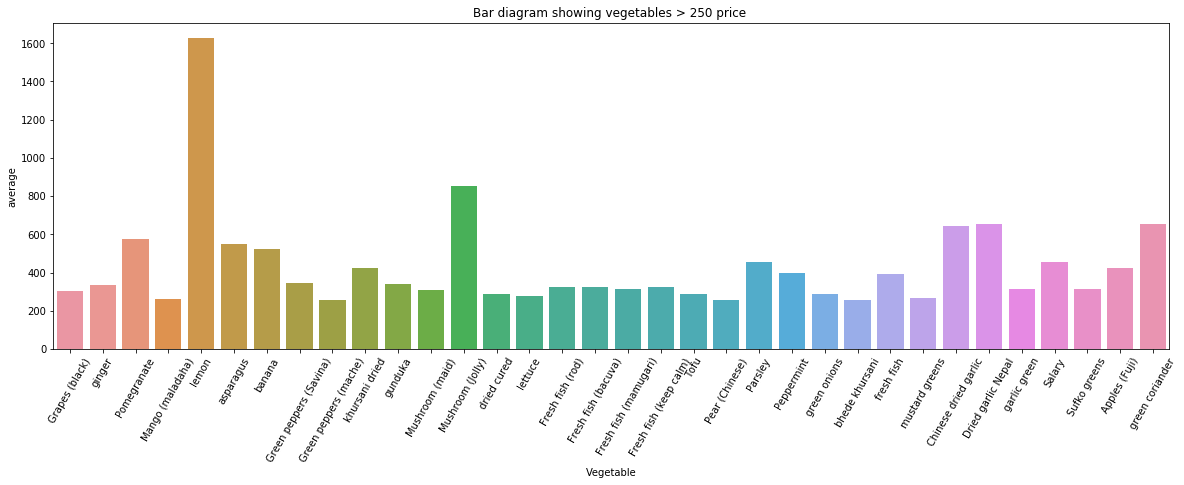

In [203]:
#Bar diagram showing vegetables > 300 price
avg_data = veg_grp_avg_gt_250.reset_index()
fig = plt.figure(figsize = (20,6))
ax = sns.barplot(x='Vegetable', y='average', data = avg_data)
ax.set_title('Bar diagram showing vegetables > 250 price ')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

[Text(0, 0, 'Grapes (green)'),
 Text(0, 0, 'Aampa (dasahari)'),
 Text(0, 0, 'tamarind'),
 Text(0, 0, 'Cowley local'),
 Text(0, 0, 'Kakko (Local)'),
 Text(0, 0, 'koiralo'),
 Text(0, 0, 'Green peppers (bullet)'),
 Text(0, 0, 'khursani green'),
 Text(0, 0, 'Carrots (Local)'),
 Text(0, 0, 'gante radish'),
 Text(0, 0, 'Large tomatoes (Nepal)'),
 Text(0, 0, 'Small tomatoes (tunnel)'),
 Text(0, 0, 'gyatha cabbage'),
 Text(0, 0, 'Butter beans (kidney beans)'),
 Text(0, 0, 'Butter beans (Local)'),
 Text(0, 0, 'Butter beans (hybrid)'),
 Text(0, 0, 'Cmsurko greens'),
 Text(0, 0, 'Tate Simi'),
 Text(0, 0, 'Large tomatoes (India)'),
 Text(0, 0, 'copper'),
 Text(0, 0, 'bitter gourd'),
 Text(0, 0, 'mustard greens'),
 Text(0, 0, 'Pear (Local)'),
 Text(0, 0, 'Prvr (Local)'),
 Text(0, 0, 'Palugo greens'),
 Text(0, 0, 'Dried onion Indian'),
 Text(0, 0, 'Bkula'),
 Text(0, 0, 'Body (trunk)'),
 Text(0, 0, 'broccoli'),
 Text(0, 0, 'bhatamasakosa'),
 Text(0, 0, 'Okra'),
 Text(0, 0, 'bhuri tangerine'),
 Text(0

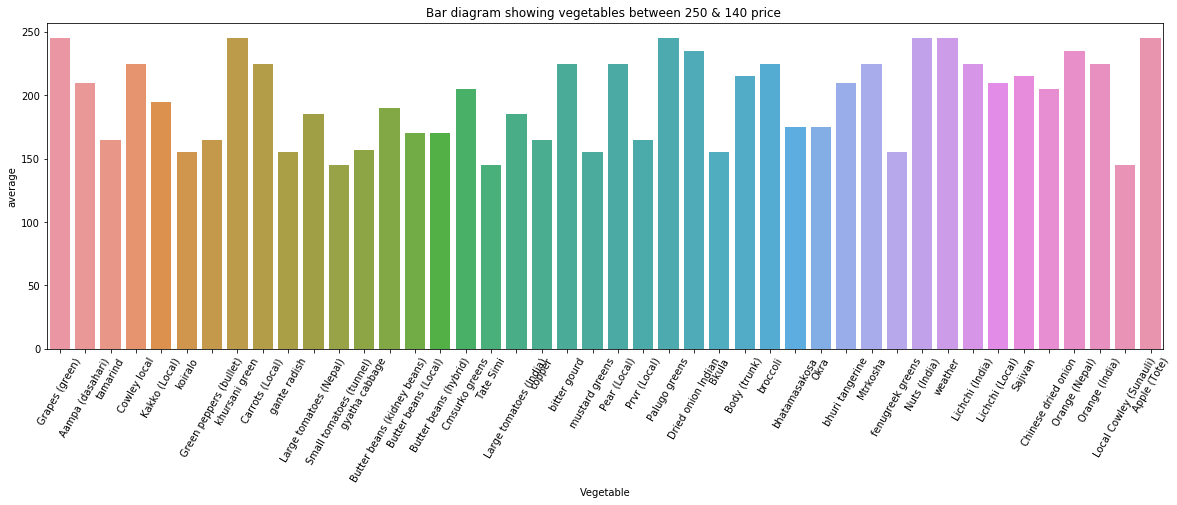

In [204]:
# Bar diagram showing vegetables between 250 & 140 price
avg_data_below = veg_grp_avg_lt_250_gt_140.reset_index()
fig = plt.figure(figsize = (20,6))

ax=sns.barplot(x='Vegetable', y='average', data = avg_data_below)
ax.set_title('Bar diagram showing vegetables between 250 & 140 price ')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)


[Text(0, 0, 'AMBA'),
 Text(0, 0, 'aalu red'),
 Text(0, 0, 'aalu white'),
 Text(0, 0, 'Potatoes Red (India)'),
 Text(0, 0, 'Potatoes Red (prop)'),
 Text(0, 0, 'Cowley tarari'),
 Text(0, 0, 'Kakko (hybrid)'),
 Text(0, 0, 'Carrots (valley)'),
 Text(0, 0, 'small tomatoes'),
 Text(0, 0, 'Small tomatoes (valley)'),
 Text(0, 0, 'Small tomatoes (India)'),
 Text(0, 0, 'ghiraula'),
 Text(0, 0, 'cicindo'),
 Text(0, 0, 'cukundara'),
 Text(0, 0, 'cured green'),
 Text(0, 0, 'jhiguni'),
 Text(0, 0, 'Melon (Pate)'),
 Text(0, 0, 'Leeks (green)'),
 Text(0, 0, 'yam'),
 Text(0, 0, 'Neuro'),
 Text(0, 0, 'Parver (valley)'),
 Text(0, 0, 'randia uliginosa'),
 Text(0, 0, 'ripe Pumpkin'),
 Text(0, 0, 'Pumpkin green (elongated)'),
 Text(0, 0, 'Cabbage (valley)'),
 Text(0, 0, 'Cabbage (coconut)'),
 Text(0, 0, 'Cabbage (Local)'),
 Text(0, 0, 'Brela'),
 Text(0, 0, 'Aubergine ball'),
 Text(0, 0, 'elongated eggplant'),
 Text(0, 0, 'maize body'),
 Text(0, 0, 'red radish'),
 Text(0, 0, 'White radish (Local)'),
 Text(0,

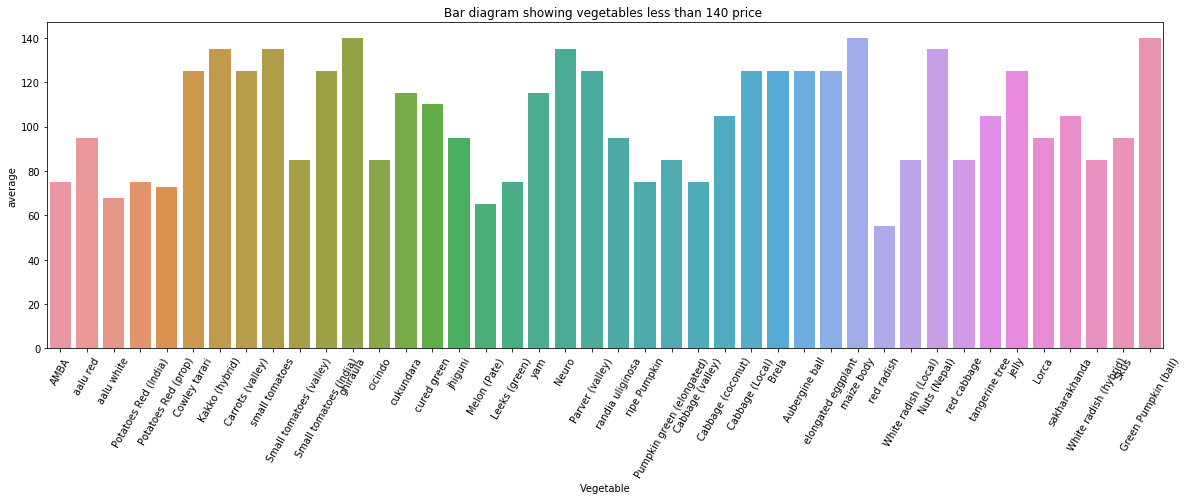

In [205]:
#Bar diagram showing vegetables less than 140 price
avg_data_below = veg_grp_avg_lt_140.reset_index()
fig = plt.figure(figsize = (20,6))

ax=sns.barplot(x='Vegetable', y='average', data = avg_data_below)
ax.set_title('Bar diagram showing vegetables less than 140 price ')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

In [15]:
#Group_by_name_max_price

max_price_by_name = df.groupby(by=['Vegetable'], as_index=False)[['low_price','high_price', 'average']].max()
print(max_price_by_name)

                 Vegetable  low_price  high_price  average
0              अंगुर(कालो)        300         310      305
1             अंगुर(हरियो)        240         250      245
2                    अदुवा        330         340      335
3                     अनार        550         600      575
4                    अम्बा         70          80       75
..                     ...        ...         ...      ...
115  स्थानीय काउली(ज्यापु)        140         150      145
116            स्याउ(झोले)        240         250      245
117            स्याउ(फूजी)        400         450      425
118            हरियो धनिया        650         660      655
119     हरियो फर्सी(डल्लो)        130         150      140

[120 rows x 4 columns]


###### Items with highest  and lowest price in avg in past 2 years

In [211]:
#sorted in ascending decending order of average price
veg_grp = df_new.groupby(by=['Vegetable'], as_index=False)[['low_price','high_price', 'average']].max()
# veg_grp = df_new.groupby(by=['Vegetable'], as_index=False)[['low_price','high_price', 'average']].mean()
# veg_grp = df_new.groupby(by=['Vegetable'], as_index=False)[['low_price','high_price', 'average']].min()

veg_sorted_dec = veg_grp.sort_values(by='average', ascending=False)
veg_sorted_dec

,Vegetable,low_price,high_price,average
16,कागती,1600,1650,1625
43,च्याउ(डल्ले),850,860,855
101,लसुन सुकेको नेपाली,650,660,655
118,हरियो धनिया,650,660,655
100,लसुन सुकेको चाइनिज,640,650,645
...,...,...,...,...
4,अम्बा,70,80,75
10,आलु रातो(मुडे),70,75,73
7,अालु सेतो,65,70,68
50,तरबुजा(पाटे),60,70,65


In [212]:
veg_sorted_asc = veg_grp.sort_values(by='average', ascending=True)
veg_sorted_asc

,Vegetable,low_price,high_price,average
90,मूला रातो,50,60,55
50,तरबुजा(पाटे),60,70,65
7,अालु सेतो,65,70,68
10,आलु रातो(मुडे),70,75,73
75,बन्दा(तराई),70,80,75
...,...,...,...,...
100,लसुन सुकेको चाइनिज,640,650,645
101,लसुन सुकेको नेपाली,650,660,655
118,हरियो धनिया,650,660,655
43,च्याउ(डल्ले),850,860,855


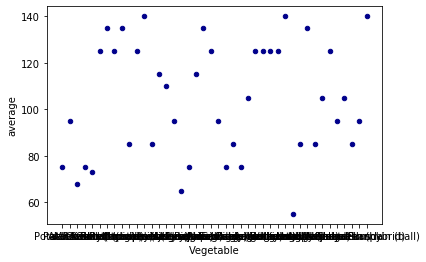

In [214]:
avg_data_below.plot.scatter(x='Vegetable',y='average', c='DarkBlue')

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

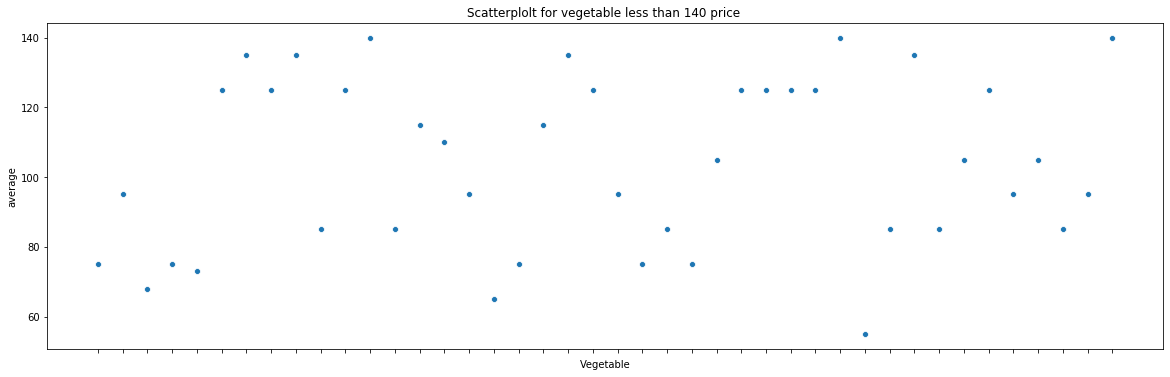

In [222]:
fig = plt.figure(figsize = (20,6))

ax=sns.scatterplot(x='Vegetable', y='average', palette="Set2", data = avg_data_below)
ax.set_title('Scatterplolt for vegetable less than 140 price ')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)



# Dataset 	भुर्इ कटहर	 -
    groupby date and price type
    plot to get the price  by date for the item

In [197]:
#Chk vegetables sold by प्रति गोटा   
cutter = df[df["Unit"] == 'psc'][['Vegetable','average', 'Date','priceType']]
cutter.groupby(by=['Date', 'priceType'])
cutter

,Vegetable,average,Date,priceType
53,भुर्इ कटहर,95,02/25/2018,W
121,भुर्इ कटहर,105,02/25/2018,R
189,भुर्इ कटहर,95,02/26/2018,W
257,भुर्इ कटहर,105,02/26/2018,R
324,भुर्इ कटहर,95,02/27/2018,W
...,...,...,...,...
98947,भुर्इ कटहर,125,02/13/2020,R
99030,भुर्इ कटहर,115,02/14/2020,W
99114,भुर्इ कटहर,125,02/14/2020,R
99198,भुर्इ कटहर,115,02/15/2020,W


In [23]:
cutter_w = cutter[cutter["priceType"] == 'W'][['Vegetable','average', 'Date','priceType']]
cutter_w

,Vegetable,average,Date,priceType
53,भुर्इ कटहर,95,02/25/2018,W
189,भुर्इ कटहर,95,02/26/2018,W
324,भुर्इ कटहर,95,02/27/2018,W
457,भुर्इ कटहर,95,02/28/2018,W
591,भुर्इ कटहर,95,03/01/2018,W
...,...,...,...,...
98544,भुर्इ कटहर,115,02/11/2020,W
98705,भुर्इ कटहर,115,02/12/2020,W
98866,भुर्इ कटहर,115,02/13/2020,W
99030,भुर्इ कटहर,115,02/14/2020,W


In [24]:
cutter_R = cutter[cutter["priceType"] == 'R'][['Vegetable','average', 'Date','priceType']]
cutter_R

,Vegetable,average,Date,priceType
121,भुर्इ कटहर,105,02/25/2018,R
257,भुर्इ कटहर,105,02/26/2018,R
390,भुर्इ कटहर,105,02/27/2018,R
524,भुर्इ कटहर,105,02/28/2018,R
658,भुर्इ कटहर,105,03/01/2018,R
...,...,...,...,...
98624,भुर्इ कटहर,125,02/11/2020,R
98786,भुर्इ कटहर,125,02/12/2020,R
98947,भुर्इ कटहर,125,02/13/2020,R
99114,भुर्इ कटहर,125,02/14/2020,R


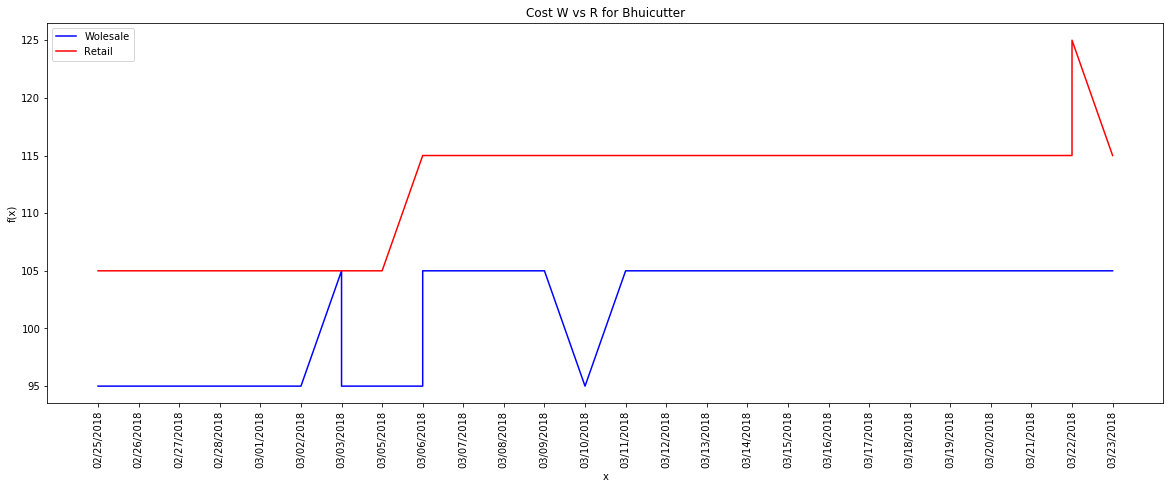

In [196]:
fig = plt.figure(figsize = (20,7))  #figsize
x = cutter['Date'][:50]
y_w = cutter_w['average'][:50]
y_r = cutter_R['average'][:50]


plt.plot(x, y_w, color = 'b', label = 'Wolesale' )
plt.plot(x, y_r, color = 'r', label = 'Retail' )

# plt.plot(a, f(a), color='green', marker='o', label='Point of intersection')
plt.legend()  # add legend
plt.xticks(rotation='vertical')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Cost W vs R for Bhuicutter')
plt.show()

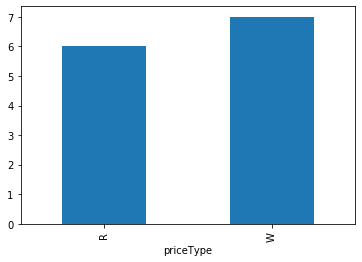

In [26]:
cutter.groupby('priceType')['average'].nunique().plot(kind='bar')


In [224]:
df_cauli = (df[df["Vegetable"] == 'काउली स्थानिय'])#.groupby('priceType')


df_cauli['month'] = ""

df_cauli['month'] = getMonth(df_cauli['Date'].tolist())

group_cauli = df_cauli.groupby(['month'])[['Vegetable', 'low_price', 'high_price','Date','priceType']].min()
group_cauli

/home/shristi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/shristi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Vegetable,low_price,high_price,Date,priceType
month,,,,,
Apr 2018,काउली स्थानिय,35,40,04/01/2018,R
Apr 2019,काउली स्थानिय,12,18,04/01/2019,R
Aug 2018,काउली स्थानिय,45,50,08/01/2018,R
Aug 2019,काउली स्थानिय,55,65,08/01/2019,R
Dec 2018,काउली स्थानिय,1,20,12/01/2018,R
Dec 2019,काउली स्थानिय,65,70,12/01/2019,R
Feb 2018,काउली स्थानिय,25,30,02/25/2018,R
Feb 2019,काउली स्थानिय,10,15,02/01/2019,R
Feb 2020,काउली स्थानिय,20,25,02/01/2020,R


In [50]:
df_cauli.groupby(['month'])[['Vegetable', 'high_price','priceType']].min()


,Vegetable,high_price,priceType
month,,,
Apr 2018,काउली स्थानिय,40,R
Apr 2019,काउली स्थानिय,18,R
Aug 2018,काउली स्थानिय,50,R
Aug 2019,काउली स्थानिय,65,R
Dec 2018,काउली स्थानिय,20,R
Dec 2019,काउली स्थानिय,70,R
Feb 2018,काउली स्थानिय,30,R
Feb 2019,काउली स्थानिय,15,R
Feb 2020,काउली स्थानिय,25,R


In [29]:
df_cauli = (df[df["Vegetable"] == 'काउली स्थानिय'])#.groupby('priceType')
print(df_cauli.groupby('priceType',)[['Vegetable', 'low_price', 'high_price','average', 'Date']].max())

               Vegetable  low_price  high_price  average        Date
priceType                                                           
R          काउली स्थानिय        220         230      225  12/31/2019
W          काउली स्थानिय        190         200      195  12/31/2019


In [32]:
df.sort_values(by='average', ascending=False).head()

,Vegetable,Unit,low_price,high_price,average,Date,priceType
6251,कागती,kg,1600,1650,1625,04/12/2018,R
6385,कागती,kg,1600,1650,1625,04/13/2018,R
5981,कागती,kg,1600,1650,1625,04/10/2018,R
6117,कागती,kg,1600,1650,1625,04/11/2018,R
5843,कागती,kg,1600,1650,1625,04/09/2018,R


In [33]:
df.sort_values(by='average', ascending=True).head()

,Vegetable,Unit,low_price,high_price,average,Date,priceType
50703,बन्दा(लोकल),kg,8,10,9,03/30/2019,W
50173,बन्दा(लोकल),kg,8,10,9,03/26/2019,W
50835,बन्दा(लोकल),kg,8,10,9,03/31/2019,W
39774,बन्दा(लोकल),kg,8,10,9,01/05/2019,W
43610,बन्दा(लोकल),kg,8,10,9,02/02/2019,W


In [225]:
vege_grp_avg_mean = df.groupby('Vegetable')['average'].mean()
vege_grp_avg_mean

Vegetable
अंगुर(कालो)              264.062500
अंगुर(हरियो)             155.222857
अदुवा                    155.915738
अनार                     208.768794
अम्बा                     53.022727
                            ...    
स्थानीय काउली(ज्यापु)     80.440299
स्याउ(झोले)              129.290960
स्याउ(फूजी)              333.477011
हरियो धनिया              159.176966
हरियो फर्सी(डल्लो)        63.719368
Name: average, Length: 120, dtype: float64

/home/shristi/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/shristi/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/shristi/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/shristi/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2369 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/shristi/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/shristi/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarn

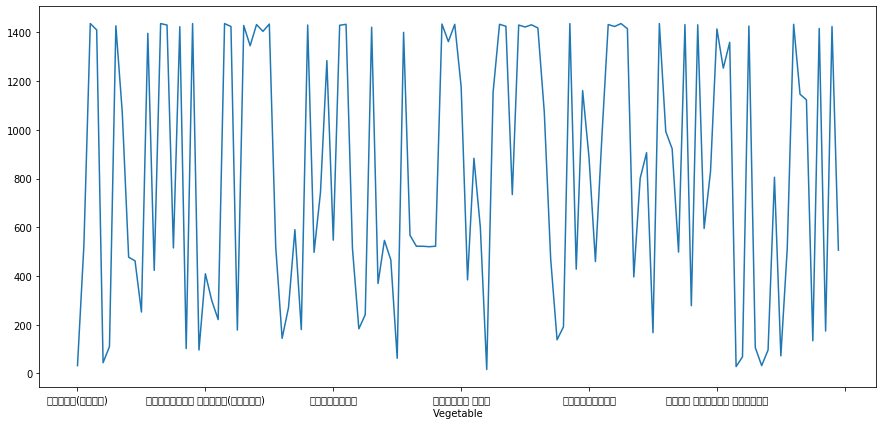

In [229]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['Vegetable']).count()['average'].plot(ax=ax)

# Lemon  Dataset per W-R shoing price for past 2 yrs
    

In [231]:
#Chk vegetables lemon  
lemon = df[df["Vegetable"] == 'कागती'][['Vegetable','Unit','average', 'Date','priceType']]
lemon['month']=''
lemon['month'] = getMonth(lemon['Date'].tolist())
lemon


,Vegetable,Unit,average,Date,priceType,month
47,कागती,kg,425,02/25/2018,W,Feb 2018
115,कागती,kg,475,02/25/2018,R,Feb 2018
183,कागती,kg,425,02/26/2018,W,Feb 2018
251,कागती,kg,475,02/26/2018,R,Feb 2018
318,कागती,kg,425,02/27/2018,W,Feb 2018
...,...,...,...,...,...,...
98940,कागती,kg,175,02/13/2020,R,Feb 2020
99022,कागती,kg,125,02/14/2020,W,Feb 2020
99106,कागती,kg,165,02/14/2020,R,Feb 2020
99190,कागती,kg,125,02/15/2020,W,Feb 2020


In [105]:
lemon_w = lemon[lemon["priceType"] == 'W'][['Vegetable','Unit','average','Date', 'month']]
print(lemon_w['average'].mean())
print(lemon_w['average'].min())
print(lemon_w['average'].max())

lemon_R = lemon[lemon["priceType"] == 'R'][['Vegetable','Unit','average', 'month']]
print(lemon_R['average'].mean())
print(lemon_R['average'].min())
print(lemon_R['average'].max())



239.08426966292134
85
1475
302.87201125175807
95
1625


115      475
251      475
384      475
518      475
652      475
        ... 
98617    155
98779    155
98940    175
99106    165
99275    165
Name: average, Length: 711, dtype: int64


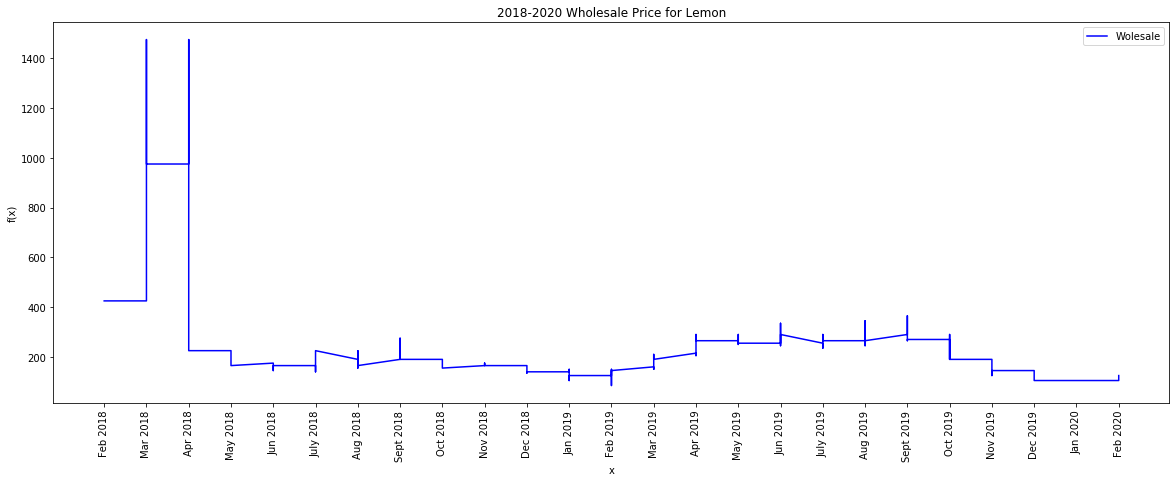

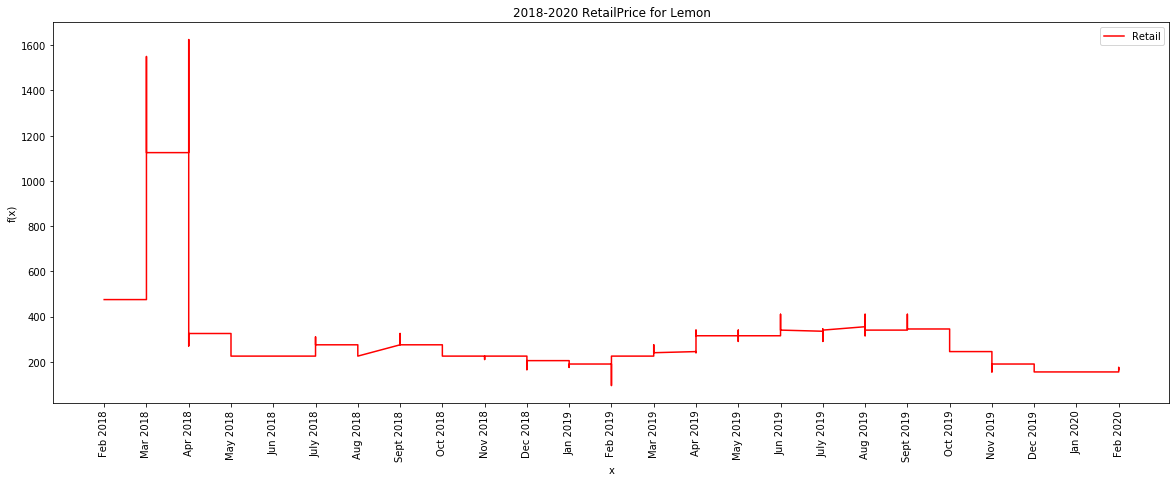

In [87]:
a=lemon_w.groupby('month')
fig = plt.figure(figsize = (20,7))  #figsize
x = lemon_w['month']
y_w = lemon_w['average']
y_R = lemon_R['average']
plt.plot(x, y_w, color = 'b', label = 'Wolesale' )
plt.legend()  # add legend
plt.xticks(rotation='vertical')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('2018-2020 Wholesale Price for Lemon')
plt.show()


fig = plt.figure(figsize = (20,7))  #figsize

x = lemon_R['month']

plt.plot(x, y_R, color = 'r', label = 'Retail' )
plt.legend()  # add legend
plt.xticks(rotation='vertical')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('2018-2020 RetailPrice for Lemon')
plt.show()